<a href="https://colab.research.google.com/github/BlickandMorty/Linear-Regression-Analytical-vs.-Iterative-Benchmarking/blob/main/Efficiency_in_Regression_OLS_vs_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Benchmarking Linear Algebra vs. Deep Learning

**Project Goal:** To prove that "Training" isn't always the best answer. For medium-sized linear datasets, exact mathematical solutions are faster and more accurate than iterative AI.

### 🧪 The Experiment
1. **Analytical:** Solve $W = (X^T X)^{-1} X^T Y$ (The Normal Equation).
2. **Iterative:** Use Gradient Descent to "learn" weights over 500 epochs.

**Math** is the "Cheat Code" for small linear data.
**AI** is the "Scalable Engine" for massive, non-linear data.

🛠️ Generating dataset with 5000 rows and 200 columns...
🧠 Solving with Matrix Math (Pseudo-inverse)...
🤖 Solving with Gradient Descent (Training)...

       FINAL COMPARISON
MATH METHOD (Exact):
  - Time:  0.467035 seconds
  - Error: 0.2477500636

AI METHOD (Iterative):
  - Time:  5.139807 seconds
  - Error: 0.2477956421


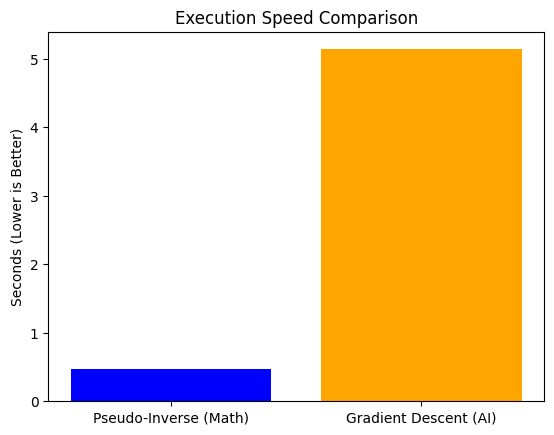

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION & DATA GENERATION ---
# n_features = the "complexity" of the problem
n_samples = 5000
n_features = 200

print(f"🛠️ Generating dataset with {n_samples} rows and {n_features} columns...")
X = np.random.randn(n_samples, n_features)
true_weights = np.random.randn(n_features, 1)
y = X @ true_weights + np.random.randn(n_samples, 1) * 0.5

# --- 2. ANALYTICAL METHOD (THE MOORE-PENROSE PSEUDO-INVERSE) ---
print("🧠 Solving with Matrix Math (Pseudo-inverse)...")
start_math = time.time()

# This is the "Closed-Form" solution: W = (X^T X)^-1 X^T Y
weights_math = np.linalg.pinv(X) @ y

math_time = time.time() - start_math
mse_math = np.mean((X @ weights_math - y)**2)

# --- 3. ITERATIVE METHOD (GRADIENT DESCENT) ---
print("🤖 Solving with Gradient Descent (Training)...")
learning_rate = 0.01
epochs = 500
weights_gd = np.random.randn(n_features, 1)

start_gd = time.time()
for epoch in range(epochs):
    error = (X @ weights_gd) - y
    gradient = (2/n_samples) * X.T @ error
    weights_gd -= learning_rate * gradient

gd_time = time.time() - start_gd
mse_gd = np.mean((X @ weights_gd - y)**2)

# --- 4. THE SHOWDOWN (RESULTS) ---
print("\n" + "="*30)
print("       FINAL COMPARISON")
print("="*30)
print(f"MATH METHOD (Exact):")
print(f"  - Time:  {math_time:.6f} seconds")
print(f"  - Error: {mse_math:.10f}")

print(f"\nAI METHOD (Iterative):")
print(f"  - Time:  {gd_time:.6f} seconds")
print(f"  - Error: {mse_gd:.10f}")
print("="*30)

# Visualization of Speed Gap
methods = ['Pseudo-Inverse (Math)', 'Gradient Descent (AI)']
times = [math_time, gd_time]
plt.bar(methods, times, color=['blue', 'orange'])
plt.ylabel('Seconds (Lower is Better)')
plt.title('Execution Speed Comparison')
plt.show()